## 2. Use diabetes dataset and perform the following:
1. Implement Pre-processing functions
    - check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Determine the number of clusters using Elbow method.
3. Apply k-means clustering using the value of k determined in step (2).
4. Form the clusters.
5. Evaluate the quality of clusters formed by k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv("D:\\Dataset\\diabetes.csv")
display(data.sample(5))

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
267,2,128,64,42,0,40.0,1.101,24,0
181,0,119,64,18,92,34.9,0.725,23,0
536,0,105,90,0,0,29.6,0.197,46,0
67,2,109,92,0,0,42.7,0.845,54,0
669,9,154,78,30,100,30.9,0.164,45,0


In [2]:
# Zeros in BloodPressure, Glucose, SkinThickness, Insulin, BMI are actually missing values.
data[['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']] = data[['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print(data.isnull().sum())

<IPython.core.display.Javascript object>

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer


simputer_mode = SimpleImputer(strategy='most_frequent')
simputer_mean = SimpleImputer(strategy='mean')

In [5]:
data['BloodPressure'] = simputer_mode.fit_transform(data['BloodPressure'].values.reshape(-1, 1))
data['SkinThickness'] = simputer_mean.fit_transform(data['SkinThickness'].values.reshape(-1, 1))
data['Glucose'] = simputer_mode.fit_transform(data['Glucose'].values.reshape(-1, 1))
data['Insulin'] = simputer_mode.fit_transform(data['Insulin'].values.reshape(-1, 1))
data['BMI'] = simputer_mode.fit_transform(data['BMI'].values.reshape(-1, 1))

In [6]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

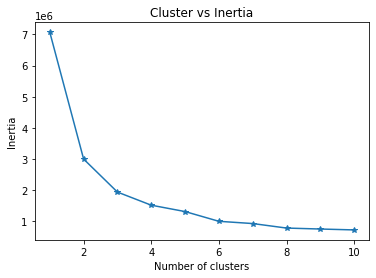

In [9]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=1000, tol=1e-04, random_state=1)
    km.fit(X)
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertias, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Cluster vs Inertia")
plt.show()

Judging from the graph, the elbow curves when number of cluster is 2. Hence selecting n_clusters = 2.

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=1000, random_state=1)

km.fit(X_train)
y_pred = km.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy(quality) of the model : ", accuracy_score(y_test, y_pred))

Accuracy(quality) of the model :  0.6406926406926406


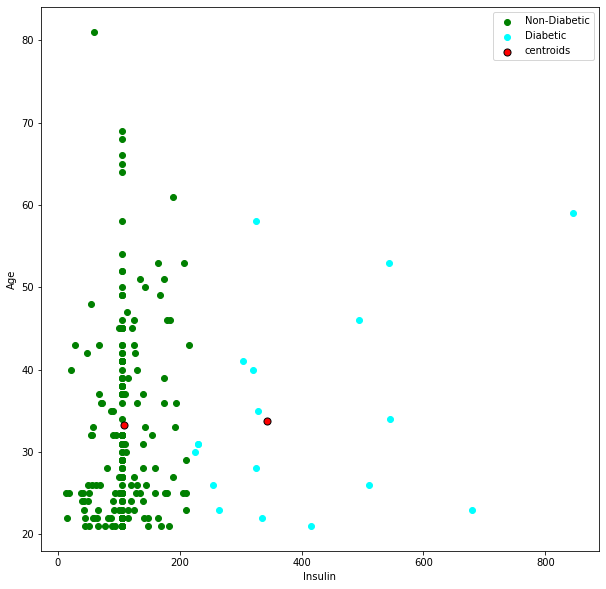

In [12]:
plt.figure(figsize=(10,10))
# plot the 2 clusters
plt.scatter( X_test[y_pred == 0].iloc[:, 4], X_test[y_pred == 0].iloc[:, 7], c='green', label='Non-Diabetic')
plt.scatter( X_test[y_pred == 1].iloc[:, 4], X_test[y_pred == 1].iloc[:, 7], c='cyan', label='Diabetic')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 4], km.cluster_centers_[:, 7], marker='o', c='red', s=50,
            edgecolor='black', label='centroids')

plt.legend()
plt.xlabel('Insulin')
plt.ylabel('Age')
plt.show()